# In Acquire (acquire.py)
### Pull Zillow

### acquire & summarize


1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.

- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.

- Only include properties that include a latitude and longitude value.

In [1]:
from env import host, user, password
import pandas as pd
import numpy as np

import acquire
import wrangle

In [2]:
df = acquire.acquire_zillow()

In [3]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,...,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc,logerror,transactiondate
0,10711855,NaN,NaN,2.0,NaN,NaN,NaN,1087254,NaN,2.0,...,NaN,6.037113e+13,None,None,None,Central,None,None,-0.007357,2017-07-07
1,10711877,NaN,NaN,2.0,NaN,NaN,1.0,1072280,NaN,2.0,...,NaN,6.037113e+13,Central,None,None,Central,None,None,0.021066,2017-08-29
2,10711888,NaN,NaN,2.0,NaN,NaN,1.0,1340933,NaN,2.0,...,NaN,6.037113e+13,Central,None,None,Central,None,None,0.077174,2017-04-04
3,10711910,NaN,NaN,2.0,NaN,NaN,NaN,1878109,NaN,2.0,...,NaN,6.037113e+13,None,None,None,Central,None,None,-0.041238,2017-03-17
4,10711923,NaN,NaN,2.0,NaN,NaN,NaN,2190858,NaN,2.0,...,NaN,6.037113e+13,None,None,None,Central,None,None,-0.009496,2017-03-24


2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
df.shape
# 77,380 rows 67 columns

(77380, 67)

In [5]:
df.info()

# there are a lot of columns missing A LOT of their values.
    # should I drop them?
    # should I fill them with another value?
        # lets find out
        
# some columns are objects
    # propertycountylandusecode
    # propertyzoningdesc
    # taxdelinquencyflag
    # airconditioningdesc  
    # architecturalstyledesc  
    # buildingclassdesc 
    # heatingorsystemdesc
    # storydesc
    # typeconstructiondesc
    # transactiondat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77380 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   heatingorsystemtypeid         49439 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   id                            77380 non-null  int64  
 8   basementsqft                  50 non-null     float64
 9   bathroomcnt                   77380 non-null  float64
 10  bedroomcnt                    77380 non-null  float64
 11  buildingqualitytypeid         49671 non-null  float64
 12  calculatedbathnbr             76771 non-null  float64
 13  d

In [6]:
df.dtypes

parcelid                    int64
typeconstructiontypeid    float64
storytypeid               float64
heatingorsystemtypeid     float64
buildingclasstypeid       float64
                           ...   
heatingorsystemdesc        object
storydesc                  object
typeconstructiondesc       object
logerror                  float64
transactiondate            object
Length: 67, dtype: object

In [7]:
# How many nulls have in each column?
df.isnull().sum()

parcelid                      0
typeconstructiontypeid    77158
storytypeid               77330
heatingorsystemtypeid     27941
buildingclasstypeid       77365
                          ...  
heatingorsystemdesc       27941
storydesc                 77330
typeconstructiondesc      77158
logerror                      0
transactiondate               0
Length: 67, dtype: int64

In [8]:
# % values missing in each column
df.isnull().sum()/len(df)*100

parcelid                   0.000000
typeconstructiontypeid    99.713104
storytypeid               99.935384
heatingorsystemtypeid     36.108814
buildingclasstypeid       99.980615
                            ...    
heatingorsystemdesc       36.108814
storydesc                 99.935384
typeconstructiondesc      99.713104
logerror                   0.000000
transactiondate            0.000000
Length: 67, dtype: float64

In [9]:
# How many nulls have in each row?
df.isnull().sum(axis=1).value_counts()

33    14782
34    13326
32    12579
31     9891
36     5775
29     5270
35     5148
37     3620
30     3455
38     1925
28      455
27      316
39      285
40      230
44       78
26       65
45       50
41       29
43       28
25       24
42       23
24       13
46        5
48        3
47        3
23        2
dtype: int64

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

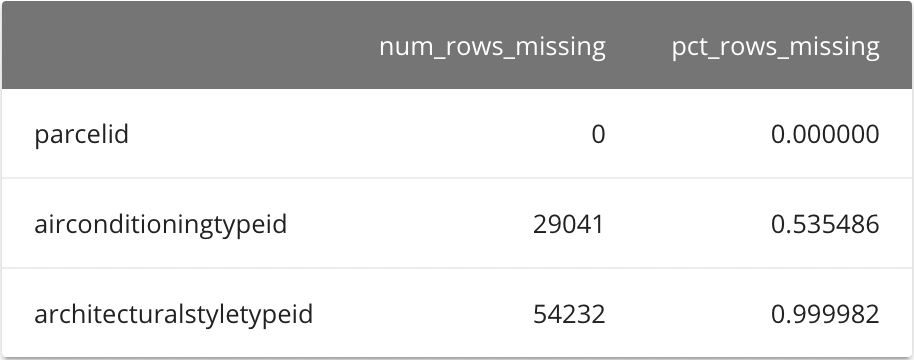

In [10]:
mz_table = wrangle.missing_zero_values_table(df)
mz_table

Your selected dataframe has 67 columns and 77380 Rows.
There are 52 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
buildingclasstypeid,0,77365,100.0,77365,100.0,float64
buildingclassdesc,0,77365,100.0,77365,100.0,object
finishedsquarefeet13,0,77339,99.9,77339,99.9,float64
basementsqft,0,77330,99.9,77330,99.9,float64
storytypeid,0,77330,99.9,77330,99.9,float64
...,...,...,...,...,...,...
fips,0,0,0.0,0,0.0,float64
bedroomcnt,830,0,0.0,830,1.1,float64
bathroomcnt,592,0,0.0,592,0.8,float64
id,0,0,0.0,0,0.0,int64


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

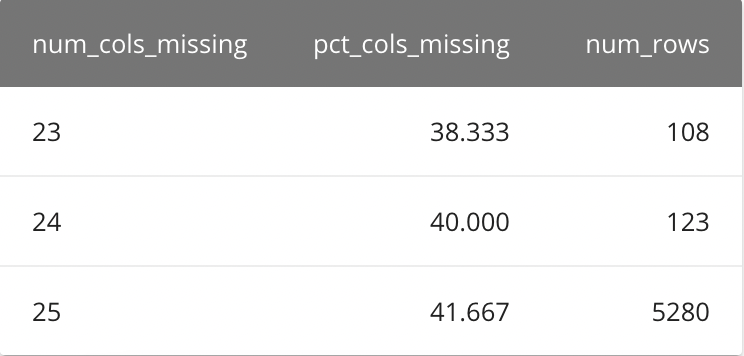

In [11]:
table_nulls = pd.DataFrame (columns = ['num_cols_missing', 'pct_cols_missing', 'num_rows'])

In [12]:
#the number of columns missing
table_nulls['num_cols_missing'] = df.apply(lambda x: x.count(), axis=1)
# percent of columns missing 
table_nulls['pct_cols_missing'] = round(100 * table_nulls.num_cols_missing/ df.shape[1], 2)
# number of rows with n columns missing.
table_nulls['num_rows'] = df.apply(lambda x: x.count())
table_nulls

,num_cols_missing,pct_cols_missing,num_rows
0,36,53.73,NaN
1,38,56.72,NaN
2,36,53.73,NaN
3,36,53.73,NaN
4,36,53.73,NaN
...,...,...,...
77375,19,28.36,NaN
77376,20,29.85,NaN
77377,19,28.36,NaN
77378,30,44.78,NaN


In [13]:
# Gotta set up the new Dataframes info
table_nulls = df.isnull().sum(axis =1).value_counts().sort_index(ascending=False)
# Make it into an officail df
table_nulls = pd.DataFrame(table_nulls)
# reset the index
table_nulls.reset_index(level=0, inplace=True)
# create the columns num_cols_missing and num_rows_missing
table_nulls.columns= ['num_cols_missing', 'num_rows_missing']
# now I need to add the percent column
table_nulls['pct_cols_missing']= round((table_nulls.num_cols_missing /df.shape[1]) * 100, 2)

table_nulls.head()

,num_cols_missing,num_rows_missing,pct_cols_missing
0,48,3,71.64
1,47,3,70.15
2,46,5,68.66
3,45,50,67.16
4,44,78,65.67


In [14]:
def null_tables(df):
    '''This function will take in a df
    counts the number of missing features
    counts the number of missing rows
    finds the percent of missing columns
    returns a table with each of theses are features'''
    # Gotta set up the new Dataframes info
    table_nulls = df.isnull().sum(axis =1).value_counts().sort_index(ascending=False)
    # Make it into an officail df
    table_nulls = pd.DataFrame(table_nulls)
    # reset the index
    table_nulls.reset_index(level=0, inplace=True)
    # create the columns num_cols_missing and num_rows_missing
    table_nulls.columns= ['num_cols_missing', 'num_rows_missing']
    # now I need to add the percent column
    table_nulls['pct_cols_missing']= round((table_nulls.num_cols_missing /df.shape[1]) * 100, 2)
    return table_nulls
table_nulls

,num_cols_missing,num_rows_missing,pct_cols_missing
0,48,3,71.64
1,47,3,70.15
2,46,5,68.66
3,45,50,67.16
4,44,78,65.67
5,43,28,64.18
6,42,23,62.69
7,41,29,61.19
8,40,230,59.70
9,39,285,58.21


In [15]:
table_nulls = wrangle.null_tables(df)
table_nulls

,num_cols_missing,num_rows_missing,pct_cols_missing
0,48,3,71.64
1,47,3,70.15
2,46,5,68.66
3,45,50,67.16
4,44,78,65.67
5,43,28,64.18
6,42,23,62.69
7,41,29,61.19
8,40,230,59.70
9,39,285,58.21


### Prepare prepare.py

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [16]:
df.propertylandusetypeid.value_counts()

261.0    52319
266.0    19294
246.0     2009
269.0     1944
248.0      727
247.0      535
265.0      333
263.0       74
275.0       58
260.0       37
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

In [17]:
def only_one_unit_homes(df):
    '''This function takes in a df
    removes rows where the propertylandusetype id is not a single unite
    returns a new df'''
    # Remove rows where propertylandusetypeid is less than 260
    clean_it = df.loc[df['propertylandusetypeid'] < 260].index
    df.drop(clean_it , inplace=True)
    # Remove rows where propertylandusetypeid is 267
    clean_it = df.loc[df['propertylandusetypeid'] == 267].index
    df.drop(clean_it , inplace=True)
        # Remove rows where propertylandusetypeid is 267
    clean_it = df.loc[df['propertylandusetypeid'] == 268].index
    df.drop(clean_it , inplace=True)
        # Remove rows where propertylandusetypeid is 267
    clean_it = df.loc[df['propertylandusetypeid'] == 269].index
    df.drop(clean_it , inplace=True)
        # Remove rows where propertylandusetypeid is 267
    clean_it = df.loc[df['propertylandusetypeid'] == 270].index
    df.drop(clean_it , inplace=True)
        # Remove rows where propertylandusetypeid is 267
    clean_it = df.loc[df['propertylandusetypeid'] == 271].index
    df.drop(clean_it , inplace=True)
    # Remove rows where propertylandusetypeid is 269
    clean_it = df.loc[df['propertylandusetypeid'] == 274].index
    df.drop(clean_it , inplace=True)
    # Remove rows where propertylandusetypeid is less than 260
    clean_it = df.loc[df['propertylandusetypeid'] > 279].index
    df.drop(clean_it , inplace=True)
    return df
df = only_one_unit_homes(df)
df.shape

(72121, 67)

In [18]:
df = wrangle.only_one_unit_homes(df)
df.head()

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,...,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc,logerror,transactiondate
0,10711855,NaN,NaN,2.0,NaN,NaN,NaN,1087254,NaN,2.0,...,NaN,6.037113e+13,None,None,None,Central,None,None,-0.007357,2017-07-07
1,10711877,NaN,NaN,2.0,NaN,NaN,1.0,1072280,NaN,2.0,...,NaN,6.037113e+13,Central,None,None,Central,None,None,0.021066,2017-08-29
2,10711888,NaN,NaN,2.0,NaN,NaN,1.0,1340933,NaN,2.0,...,NaN,6.037113e+13,Central,None,None,Central,None,None,0.077174,2017-04-04
3,10711910,NaN,NaN,2.0,NaN,NaN,NaN,1878109,NaN,2.0,...,NaN,6.037113e+13,None,None,None,Central,None,None,-0.041238,2017-03-17
4,10711923,NaN,NaN,2.0,NaN,NaN,NaN,2190858,NaN,2.0,...,NaN,6.037113e+13,None,None,None,Central,None,None,-0.009496,2017-03-24


2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [19]:
# Drop columns with 50% or more missing values
df = df.dropna(axis = 1, thresh = 0.5 * len(df.index))
    # went from 67 columns down to 33

In [20]:
# drop rows with 50% or more missing vlaues
df.dropna(axis = 0, thresh = 0.5 * len(df.columns))
    # ended up not dropping any rows 
        # will remain in the function in case anything were to change later on

,parcelid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate
0,10711855,2.0,1087254,2.0,3.0,8.0,2.0,2107.0,2107.0,6037.0,...,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,6.037113e+13,Central,-0.007357,2017-07-07
1,10711877,2.0,1072280,2.0,4.0,8.0,2.0,1882.0,1882.0,6037.0,...,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,6.037113e+13,Central,0.021066,2017-08-29
2,10711888,2.0,1340933,2.0,4.0,8.0,2.0,1882.0,1882.0,6037.0,...,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,6.037113e+13,Central,0.077174,2017-04-04
3,10711910,2.0,1878109,2.0,3.0,8.0,2.0,1477.0,1477.0,6037.0,...,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,6.037113e+13,Central,-0.041238,2017-03-17
4,10711923,2.0,2190858,2.0,4.0,8.0,2.0,1918.0,1918.0,6037.0,...,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,6.037113e+13,Central,-0.009496,2017-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77374,167655959,2.0,179190,3.0,3.0,4.0,3.0,1861.0,1861.0,6037.0,...,2014.0,359195.0,1044387.0,2016.0,685192.0,14424.81,NaN,Central,-0.130756,2017-07-05
77375,167686999,NaN,775695,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,...,NaN,NaN,26405.0,2016.0,26405.0,988.48,NaN,None,-0.068632,2017-02-28
77376,167687739,NaN,2863262,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,...,NaN,5451600.0,6440197.0,2016.0,988597.0,77045.13,NaN,None,0.360020,2017-03-03
77377,167687839,NaN,1372384,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,...,NaN,NaN,1842678.0,2016.0,1842678.0,22045.81,NaN,None,0.038797,2017-05-31


In [21]:
def drop_50_pct_null(df):
    '''This function takes in the zillow df
    removes all columns and rows with 50% nulls or more
    returns df'''
    # Drop columns with 50% or more missing values
    df = df.dropna(axis = 1, thresh = 0.5 * len(df.index))
    # went from 67 columns down to 33
    # drop rows with 50% or more missing vlaues
    df.dropna(axis = 0, thresh = 0.5 * len(df.columns))
        # ended up not dropping any rows 
            # will remain in the function in case anything were to change later on
    return df
df = drop_50_pct_null(df)
df.shape

(72121, 33)

df.unitcnt.isnull().value_counts()

In [22]:
def clean_zillow(df):
    '''This function takes in the df
    applies all the above cleaning funcitons'''
    df = wrangle.only_one_unit_homes(df)
    df = wrangle.drop_50_pct_null(df)
    return df
df = clean_zillow(df)
df.head()

,parcelid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate
0,10711855,2.0,1087254,2.0,3.0,8.0,2.0,2107.0,2107.0,6037.0,...,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,6.037113e+13,Central,-0.007357,2017-07-07
1,10711877,2.0,1072280,2.0,4.0,8.0,2.0,1882.0,1882.0,6037.0,...,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,6.037113e+13,Central,0.021066,2017-08-29
2,10711888,2.0,1340933,2.0,4.0,8.0,2.0,1882.0,1882.0,6037.0,...,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,6.037113e+13,Central,0.077174,2017-04-04
3,10711910,2.0,1878109,2.0,3.0,8.0,2.0,1477.0,1477.0,6037.0,...,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,6.037113e+13,Central,-0.041238,2017-03-17
4,10711923,2.0,2190858,2.0,4.0,8.0,2.0,1918.0,1918.0,6037.0,...,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,6.037113e+13,Central,-0.009496,2017-03-24


In [23]:
df.shape

(72121, 33)